In [9]:
import torch
from skimage import io
from skimage import io
import matplotlib.pyplot as plt
import cv2

from tqdm import tqdm

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-2-17 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
Path      = "archive/"
Path      = "/content/drive/MyDrive/152_478_AI_2564_2/video_data/"    
filename  = "WADADA .mp4"


print(Path+filename)

/content/drive/MyDrive/152_478_AI_2564_2/video_data/WADADA .mp4


In [5]:
# capture the video
cap = cv2.VideoCapture(Path+filename)

# check if capture was successful
if not cap.isOpened(): 
    print("Could not open!")
else:
    print("Video read successful!")
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width        = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height       = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps          = cap.get(cv2.CAP_PROP_FPS)
    
    print('Total frames: ' + str(total_frames))
    print('width: ' + str(width))
    print('height: ' + str(height))
    print('fps: ' + str(fps))

Video read successful!
Total frames: 7672
width: 854
height: 480
fps: 29.97


  3%|▎         | 40/1200 [00:06<03:33,  5.43it/s]

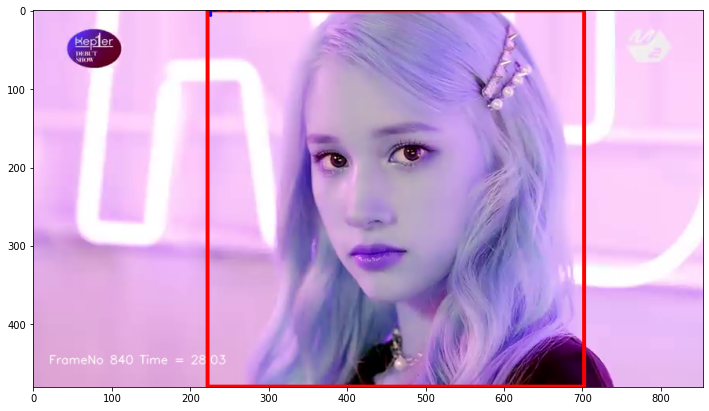

  8%|▊         | 99/1200 [00:12<01:34, 11.62it/s]

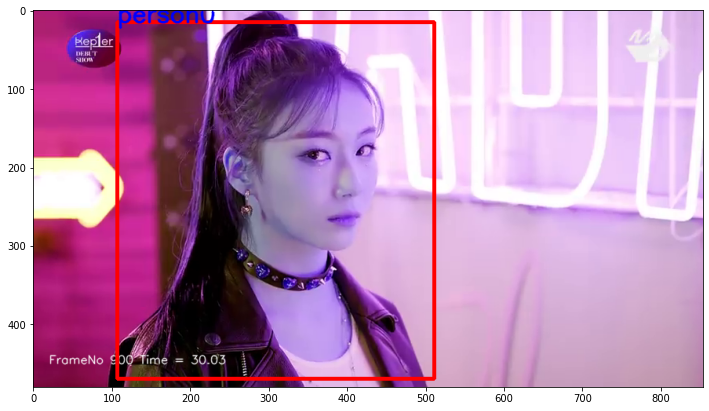

 13%|█▎        | 160/1200 [00:22<03:18,  5.24it/s]

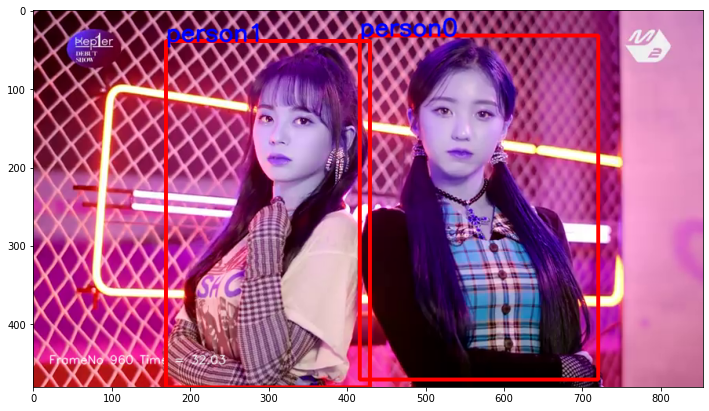

 18%|█▊        | 219/1200 [00:35<01:49,  8.93it/s]

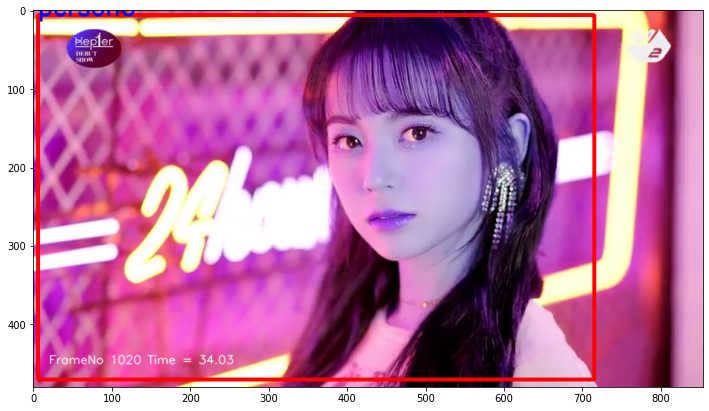

 23%|██▎       | 280/1200 [00:42<02:29,  6.16it/s]

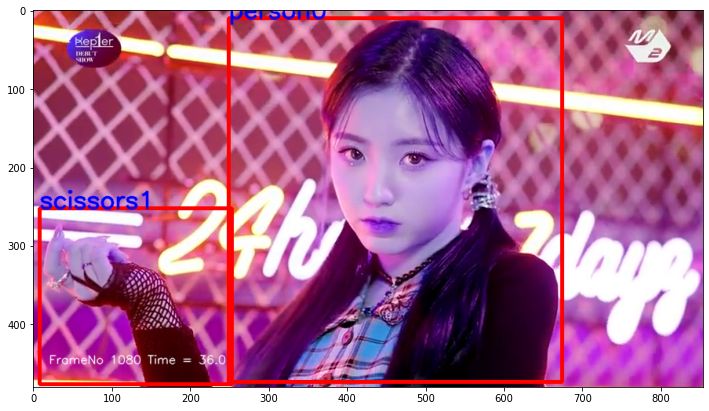

 28%|██▊       | 340/1200 [00:56<03:40,  3.89it/s]

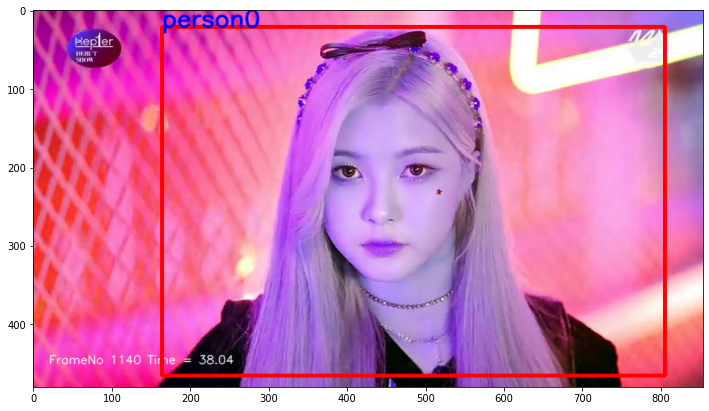

 33%|███▎      | 400/1200 [01:16<06:14,  2.14it/s]

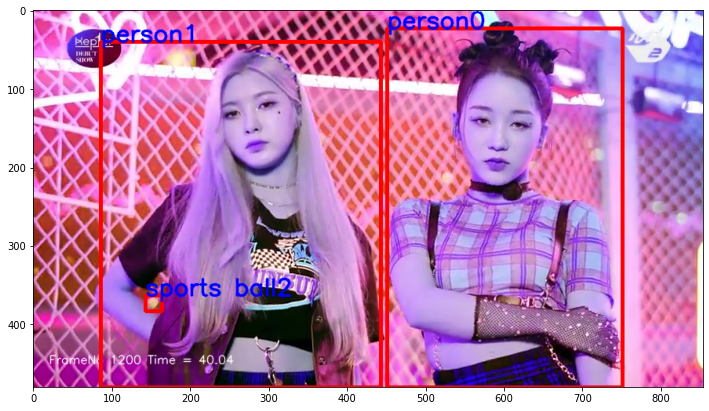

 38%|███▊      | 460/1200 [01:29<01:34,  7.81it/s]

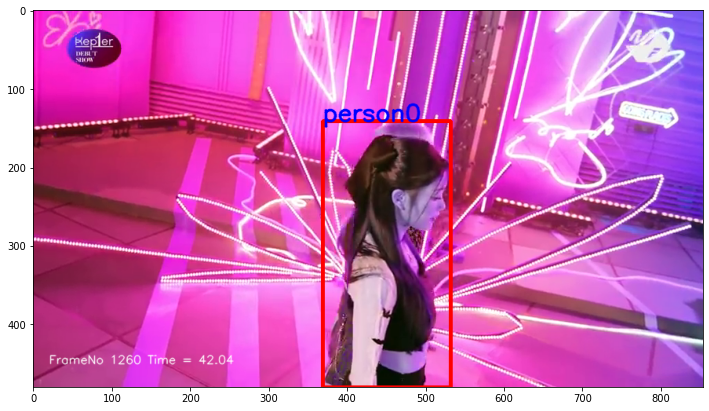

 43%|████▎     | 520/1200 [01:42<02:48,  4.03it/s]

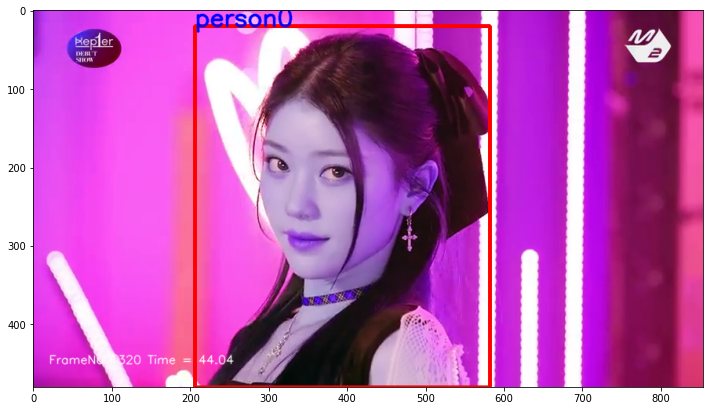

 48%|████▊     | 574/1200 [01:58<03:25,  3.05it/s]

In [ ]:
savepath = ""
savepath = "/content/drive/MyDrive/152_478_AI_2564_2/video_data/"
savefile = 'Time_stamp_output.mp4'

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out    = cv2.VideoWriter(savepath+savefile, fourcc, fps, (width,height))
    


cap = cv2.VideoCapture(Path+filename)


for i in tqdm(range(800,2000)):

    cap.set(cv2.CAP_PROP_POS_FRAMES, i)    

   # Get the next frame, but don't decode if we're not using it.
    success    = cap.grab()

    ret, image = cap.retrieve()

  

    if  ret :
      duration = i/fps
      text = f"FrameNo {i} Time = {duration:.2f}"

      start_point = (20,height-30)
      image = cv2.putText(image, text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA, False)
      out.write(image)


    
    if i% 60 ==0  :
        results = model(image)
        Dictdata =  results.pandas().xyxy[0].to_dict('index')
        # Blue color in BGR
        color = (255, 0, 0)
        # Line thickness of 2 px
        thickness = 3

        for key, x in Dictdata.items():
          if x['name'] != None :
              start_point = ( int(x['xmin']), int(x['ymin']) )
              end_point   = ( int(x['xmax']), int(x['ymax']) )
              image = cv2.rectangle(image, start_point, end_point, color, thickness)
              text = x['name']+str(key)
              image = cv2.putText(image, text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA, False)

        plt.figure(figsize=(12, 12))
        plt.imshow(image)
        plt.show()


out.release()      
cap.release()
